# Course Project No 3 - Part 1 - Warm-up

Let's import all the libraries that we will use in this Notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split



Define some constant used within this Notebook. Those constant might be modified if needed.

In [2]:
TRAIN_SIZE=0.5 # Train/Test data ratio
RANDOM_STATE=0 # Value passed to train_test_split function
FIGURE_SIZE=(15,8) # tuple used to set figure size

## Task 1
Fit the following equation to a set of 50 x/y data points.

y=a∗log(x)+b

First of all, let's load data from task-1.csv file and keep 50% of it on a random basis using train_test_split() function.

Resulting data will be used to initialize two variables (x and y)

In [3]:
t1_df = pd.read_csv(os.path.join('data','task-1.csv'))

# Split data in two dataframe
t1_train_df, t1_test_df = train_test_split(t1_df, test_size = 1-TRAIN_SIZE, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

# Build x and y narray from the train and test dataframe
x_tr = t1_train_df.x.values
y_tr = t1_train_df.y.values
x_te = t1_test_df.x.values
y_te = t1_test_df.y.values

x = np.concatenate((x_tr, x_te))
y = np.concatenate((y_tr, y_te))
print("Shape of x_tr variable:",x_tr.shape)
print("Shape of y_tr variable:",y_tr.shape)

print("Shape of x_te variable:",x_te.shape)
print("Shape of y_te variable:",y_te.shape)

print("Shape of x variable:",x.shape)
print("Shape of y variable:",y.shape)



Shape of x_tr variable: (25,)
Shape of y_tr variable: (25,)
Shape of x_te variable: (25,)
Shape of y_te variable: (25,)
Shape of x variable: (50,)
Shape of y variable: (50,)


Plot the train and test data in a scatter plot. We define a function to build this base graph as we will draw it later when doing regression stuff

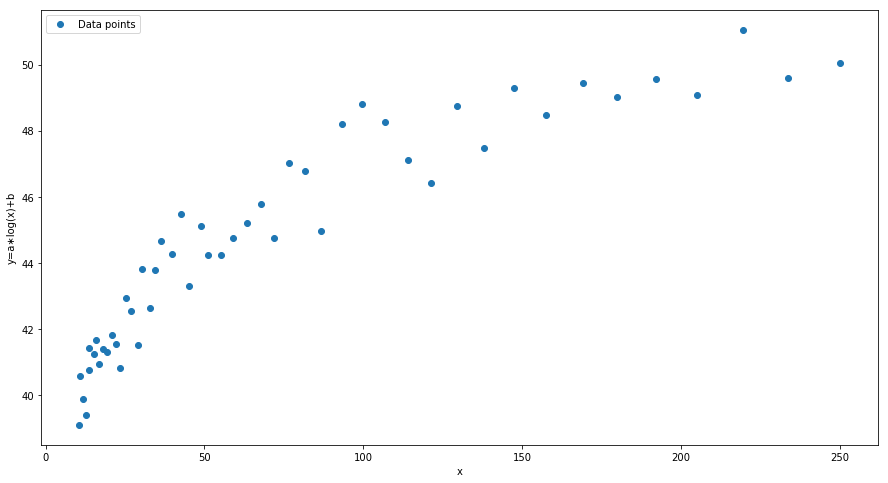

In [4]:
def drawTask1BaseGraph(x, y, xlabel = 'x', plots = ()):
    '''
    This function draws a base scatter graph using x and y passed as parameters.
    The x label can be passed as parameter as well (x scale will be different on the following graphs)
    The plots parameter is a list of tuples each containing:
        (x_values, y_values, label, color)
    This list of tuple is processed to draw the corresponding curves
    '''
    # Set figure size
    plt.figure(figsize=FIGURE_SIZE)

    for (x_plot,y_plot,label, color) in plots:
        plt.plot(x_plot, y_plot, label=label, c=color)
    
    plt.scatter(x, y, label='Data points')
    plt.xlabel(xlabel)
    plt.ylabel('y=a∗log(x)+b')
    # set legend position on the upper left corner
    plt.legend(loc="upper left")
    plt.show()

    
# Call our base graphing function
drawTask1BaseGraph(x,y)


Let's now fit a model to that datapoint using the Train dataset

Before fiiting a model, let's convert the x values to np.log(x). The resulting data point looks like to be linear, and the simplest fitting model that we could use is np.polyfit(deg=1)

Let's draw np.log(x),y plots

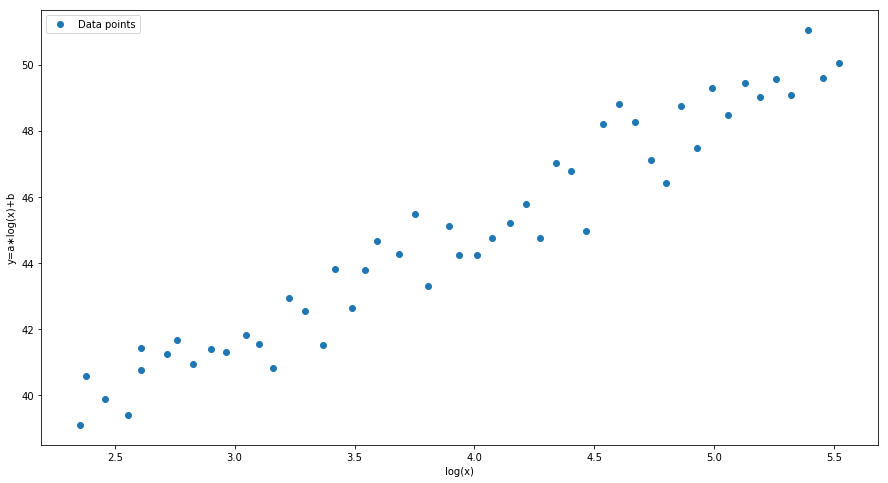

In [5]:
# Calculate np.log() x values
x_tr_log = np.log(x_tr)
x_te_log = np.log(x_te)
x_log = np.log(x)

# Draw the base graph using those np.log() values
drawTask1BaseGraph(x_log,y, xlabel='log(x)')

Let's now fit a model using np.polyfit(deg=1)

Coefficient found (deg=1):  [ 3.41817105 31.48145859]


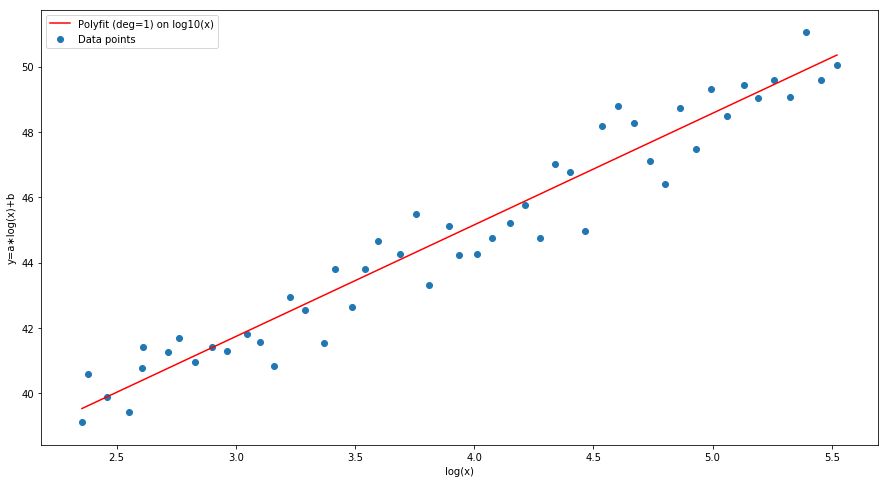

In [6]:

coef_1 = np.polyfit(x_tr_log, y_tr, deg=1)
print("Coefficient found (deg=1): ", coef_1 )

# Build linear values to plot our model
x_values = np.linspace(x_tr_log.min(), x_tr_log.max(), num=100)
y_values = np.polyval(coef_1,x_values)

drawTask1BaseGraph(x_log, y, xlabel='log(x)', plots=[(x_values, y_values, 'Polyfit (deg=1) on log10(x)', 'red')])


Now, we can easily draw the graph without the np.log() rescale using x=np.exp(x) formula

Here is the result:

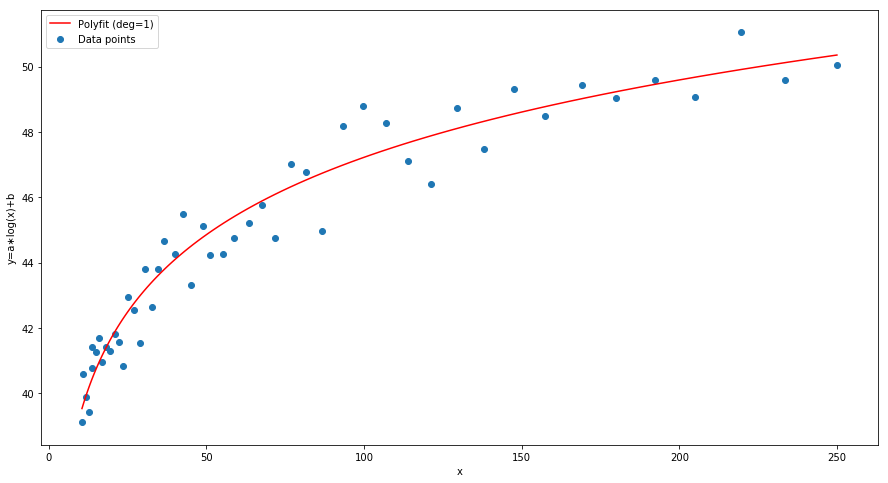

In [7]:
drawTask1BaseGraph(np.exp(x_log), y, plots=[(np.exp(x_values), y_values, 'Polyfit (deg=1)', 'red')])

Let's now evaluate our model using $R^2$ score

To do so, we will need a function that calculates the RSS value of a prediction, and calculate an RSS baseline using the mean value as prediction.

These RSS and $R^2$ calculation will use the Test dataset

In [12]:
# Define RSS measure function
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

# Calculate RSS of the baseline using y.mean()
rss_baseline = RSS(y_te, y_te.mean())
print('RSS baseline:', rss_baseline) # ~100.86

# RSS of the model (coef_1 are the polynom coefficients)
# Warning. We must use np.log(x_te) value to get y_te predicition
rss_model = RSS(y_te,np.polyval(coef_1,(x_te_log)))
print("RSS model:",rss_model)

# Calculate R2
R2 = 1 - (rss_model/rss_baseline)
print("R^2:",R2)

RSS baseline: 214.86506095999997
RSS model: 19.22548401938545
R^2: 0.9105229862245284


Our $R^2$ score is near of 1, we can conclude that our model is a good one to predict y values of our dataset.

To go further, we can check if increasing the polyfit degree parameter could improve our $R^2$ score. Let's use deg=3 and deg=5 and plot a bar chart to compare our RSS results. The bar graph y axis limit will be set near of the R2 score in order to see the difference between the three different models.

RSS model (deg=1): 19.22548401938545
RSS model (deg=3): 18.681404097662988
RSS model (deg=5): 18.85732850620712
R^2 (deg=1): 0.9105229862245284
R^2 (deg=3): 0.9130551797756417
R^2 (deg=5): 0.9122364128353205


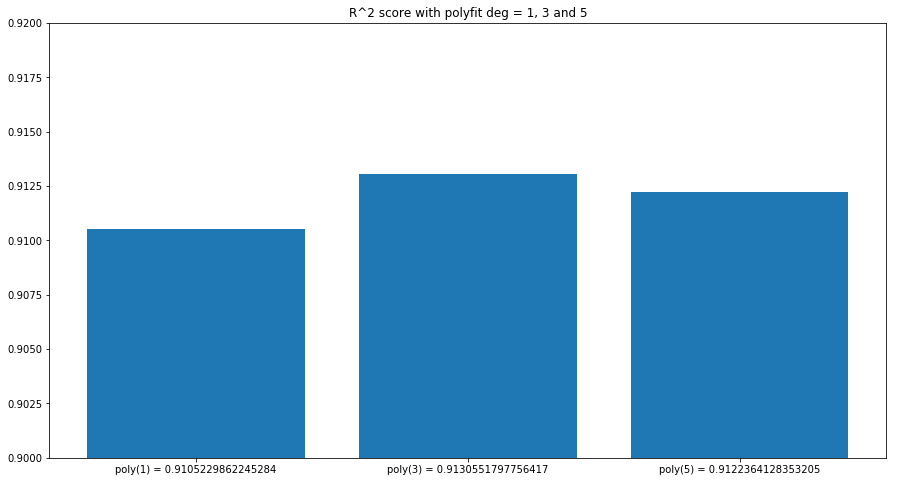

In [30]:
coef_3 = np.polyfit(x_tr_log, y_tr, deg=3)
coef_5 = np.polyfit(x_tr_log, y_tr, deg=5)

# Build linear values to plot our model
y_values_3 = np.polyval(coef_3,x_values)
y_values_5 = np.polyval(coef_5,x_values)

rss_model_3 = RSS(y_te,np.polyval(coef_3,(x_te_log)))
rss_model_5 = RSS(y_te,np.polyval(coef_5,(x_te_log)))
print("RSS model (deg=1):",rss_model)
print("RSS model (deg=3):",rss_model_3)
print("RSS model (deg=5):",rss_model_5)

# Calculate R2
R2_3 = 1 - (rss_model_3/rss_baseline)
R2_5 = 1 - (rss_model_5/rss_baseline)
print("R^2 (deg=1):",R2)
print("R^2 (deg=3):",R2_3)
print("R^2 (deg=5):",R2_5)

# Bar chart to compare our model
plt.figure(figsize=FIGURE_SIZE)
#plt.bar([1, 2, 3], [rss_model, rss_model_3, rss_model_5])
plt.bar([1, 2, 3], [R2, R2_3, R2_5])
plt.xticks([1, 2, 3], ['poly(1) = '+str(R2),'poly(3) = '+str(R2_3),'poly(5) = '+str(R2_5)])
plt.title('R^2 score with polyfit deg = 1, 3 and 5')
plt.ylim((0.9, 0.92))
plt.show()



### Task 1 - Conclusion